<a href="https://colab.research.google.com/github/kharerahul002/Forecasting-Models/blob/master/MA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import quandl
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
# Explore time series data
quandl.ApiConfig.api_key = 'knewsUunFYUMpN7y7xKn'
series = quandl.get('BSE/BOM500325') #reliance
series

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1991-01-02,115.0,115.00,105.00,107.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,-7.50
1991-01-03,107.5,107.50,95.00,97.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,12.50,-10.00
1991-01-07,105.0,107.50,97.50,105.00,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,0.00
1991-01-09,105.0,105.00,101.25,102.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,3.75,-2.50
1991-01-11,102.5,110.00,100.00,108.75,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,6.25
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-28,1451.4,1454.75,1391.95,1428.10,1421.15,1301548.0,49487.0,1.849695e+09,159436.0,12.25,62.80,-23.30
2020-04-29,1446.0,1453.05,1420.50,1426.20,1436.20,642967.0,25581.0,9.234291e+08,119218.0,18.54,32.55,-19.80
2020-04-30,1454.0,1494.50,1440.00,1467.05,1469.70,1277127.0,47637.0,1.876995e+09,199937.0,15.66,54.50,13.05


In [0]:
type(series)

pandas.core.frame.DataFrame

In [0]:
series = series['Open']
series

Date
1991-01-02     115.0
1991-01-03     107.5
1991-01-07     105.0
1991-01-09     105.0
1991-01-11     102.5
               ...  
2020-04-28    1451.4
2020-04-29    1446.0
2020-04-30    1454.0
2020-05-11    1582.0
2020-05-12    1578.0
Name: Open, Length: 7093, dtype: float64

In [0]:
# prepare situation
X = series.values
window = 30
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

In [0]:
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

Streaming output truncated to the last 5000 lines.
predicted=285.700000, expected=280.000000
predicted=283.300000, expected=291.250000
predicted=281.375000, expected=320.750000
predicted=280.533333, expected=325.050000
predicted=279.631667, expected=300.000000
predicted=277.965000, expected=304.600000
predicted=276.585000, expected=328.900000
predicted=276.215000, expected=370.000000
predicted=277.518333, expected=360.300000
predicted=278.491667, expected=330.000000
predicted=278.498333, expected=331.100000
predicted=278.201667, expected=282.750000
predicted=277.460000, expected=300.000000
predicted=276.860000, expected=299.000000
predicted=277.326667, expected=317.000000
predicted=278.560000, expected=346.100000
predicted=281.528333, expected=322.000000
predicted=284.195000, expected=307.700000
predicted=286.611667, expected=361.000000
predicted=290.911667, expected=347.000000
predicted=294.978333, expected=354.000000
predicted=299.915000, expected=327.900000
predicted=303.511667, exp

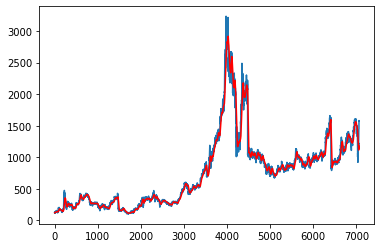

In [0]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

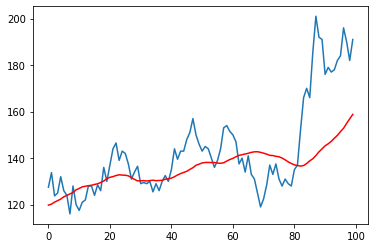

In [0]:
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.show()